In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv")

### Problem Statement
1. Predict the ***delivery time*** for an order given some feature-list!

#### Feature-list:
- market_id : integer id for the market where the restaurant lies
- created_at : the timestamp at which the order was placed
- actual_delivery_time : the timestamp when the order was delivered
- store_primary_category : category for the restaurant
- order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
- total_items subtotal : final price of the order
- num_distinct_items : the number of distinct items in the order
- min_item_price : price of the cheapest item in the order
- max_item_price : price of the costliest item in order
- total_onshift_partners : number of delivery partners on duty at the time order was placed
- total_busy_partners : number of delivery partners attending to other tasks
- total_outstanding_orders : total number of orders to be fulfilled at the moment


In [3]:
df.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0


In [4]:
df.shape

(197428, 14)

In [5]:
# extrct hour from created_at, day of the week 

df["hour"] = pd.to_datetime(df["created_at"]).dt.hour 
df["day"] = pd.to_datetime(df["created_at"]).dt.dayofweek

In [6]:
df["store_id"].nunique()

6743

In [7]:
df.isna().sum() / df.shape[0] * 100

market_id                   0.499929
created_at                  0.000000
actual_delivery_time        0.003546
store_id                    0.000000
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
hour                        0.000000
day                         0.000000
dtype: float64

In [8]:
df["estimated_delivery_time"] = pd.to_datetime(df["actual_delivery_time"]) - pd.to_datetime(df["created_at"])

In [9]:
# total minutes for the delivery
df["estimated_delivery_time"] = df["estimated_delivery_time"].dt.total_seconds() /60

Normally the delivery time should count from the moment the order was picked from the store , however the store pickup time was not available so we will use difference of actual_delivery_time and created_at

<AxesSubplot: xlabel='estimated_delivery_time'>

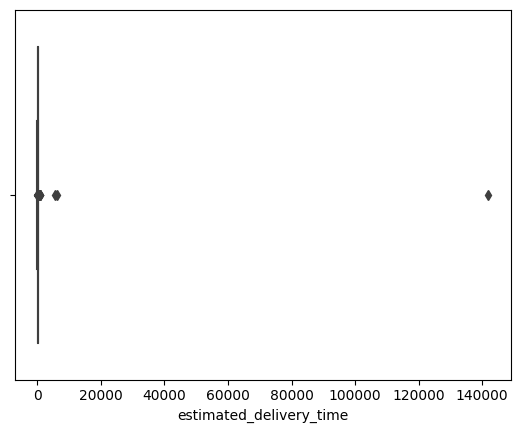

In [10]:
# create boxplot of estimated delivery time

sns.boxplot(x = df["estimated_delivery_time"])


In [11]:
df["estimated_delivery_time"].median()

44.333333333333336

In [12]:
# max and min of estimated delivery time    

df["estimated_delivery_time"].max(), df["estimated_delivery_time"].min()

(141947.65, 1.6833333333333333)

In [13]:
# top ten max time for estimated delivery time

df.nlargest(10, "estimated_delivery_time")

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour,day,estimated_delivery_time
2690,1.0,2014-10-19 05:24:15,2015-01-25 19:11:54,675f9820626f5bc0afb47b57890b466e,italian,1.0,1,1695,1,1595,1595,NaN,NaN,NaN,5,6,141947.650000
185550,4.0,2015-01-28 08:34:06,2015-02-01 16:25:25,1679091c5a880faf6fb5e6087eb1b2dc,dessert,5.0,3,1520,3,220,750,0.0,0.0,0.0,8,2,6231.316667
27189,1.0,2015-02-16 02:24:09,2015-02-19 22:45:31,d397c2b2be2178fe6247bd50fc97cff2,indian,3.0,4,4980,4,995,1795,72.0,68.0,104.0,2,0,5541.366667
83055,2.0,2015-02-01 02:18:07,2015-02-01 18:08:39,c1502ae5a4d514baec129f72948c266e,burger,4.0,3,2379,2,389,695,109.0,102.0,163.0,2,6,950.533333
190860,1.0,2015-02-16 02:31:05,2015-02-16 17:38:32,b132ecc1609bfcf302615847c1caa69a,indian,3.0,4,3660,4,375,1195,71.0,70.0,111.0,2,0,907.450000
86952,3.0,2015-02-05 02:11:40,2015-02-05 15:34:38,831b342d8a83408e5960e9b0c5f31f0c,thai,2.0,3,2185,3,495,995,19.0,19.0,16.0,2,3,802.966667
76743,2.0,2015-02-15 04:17:35,2015-02-15 16:59:00,9380e398ee9bea45b992a3daaa6b7c4d,pizza,6.0,1,990,1,795,795,114.0,112.0,184.0,4,6,761.416667
105825,2.0,2015-02-08 04:07:51,2015-02-08 15:03:43,5fc7c9bd1fcb12799f02da8adfa4954f,alcohol,5.0,3,2850,3,200,1500,96.0,103.0,156.0,4,6,655.866667
66787,6.0,2015-02-04 20:21:30,2015-02-05 07:02:27,e85ca00d008a532279b798033d59a4c7,italian,1.0,1,795,1,795,795,NaN,NaN,NaN,20,2,640.950000
175971,1.0,2015-02-12 20:25:17,2015-02-13 07:01:00,5d616dd38211ebb5d6ec52986674b6e4,mexican,1.0,5,1530,3,300,315,24.0,25.0,30.0,20,3,635.716667


In [14]:
# checking the duplicates 

df.duplicated().sum()

0

In [15]:
# check if created and delivered time are same 

df[df["created_at"] == df["actual_delivery_time"]].sum()

market_id                   0.0
created_at                  0.0
actual_delivery_time        0.0
store_id                    0.0
store_primary_category      0.0
order_protocol              0.0
total_items                 0.0
subtotal                    0.0
num_distinct_items          0.0
min_item_price              0.0
max_item_price              0.0
total_onshift_partners      0.0
total_busy_partners         0.0
total_outstanding_orders    0.0
hour                        0.0
day                         0.0
estimated_delivery_time     0.0
dtype: float64

In [16]:
df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
hour                            0
day                             0
estimated_delivery_time         7
dtype: int64

total onshift partners and total busy partners are directly dependent on each other

In [17]:
# we can try mode imputaton based on group by wrto store_id 
# however let's try removing null values and try to solve the problem first 
# drop null values 
df.dropna(axis = 0, inplace=True)

In [18]:
df.drop(["created_at", "actual_delivery_time",'store_id'], axis = 1, inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   store_primary_category    176248 non-null  object 
 2   order_protocol            176248 non-null  float64
 3   total_items               176248 non-null  int64  
 4   subtotal                  176248 non-null  int64  
 5   num_distinct_items        176248 non-null  int64  
 6   min_item_price            176248 non-null  int64  
 7   max_item_price            176248 non-null  int64  
 8   total_onshift_partners    176248 non-null  float64
 9   total_busy_partners       176248 non-null  float64
 10  total_outstanding_orders  176248 non-null  float64
 11  hour                      176248 non-null  int64  
 12  day                       176248 non-null  int64  
 13  estimated_delivery_time   176248 non-null  f

C:\Users\mahik\AppData\Local\Temp\ipykernel_20508\3415888245.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method="spearman").round(2), annot = True)


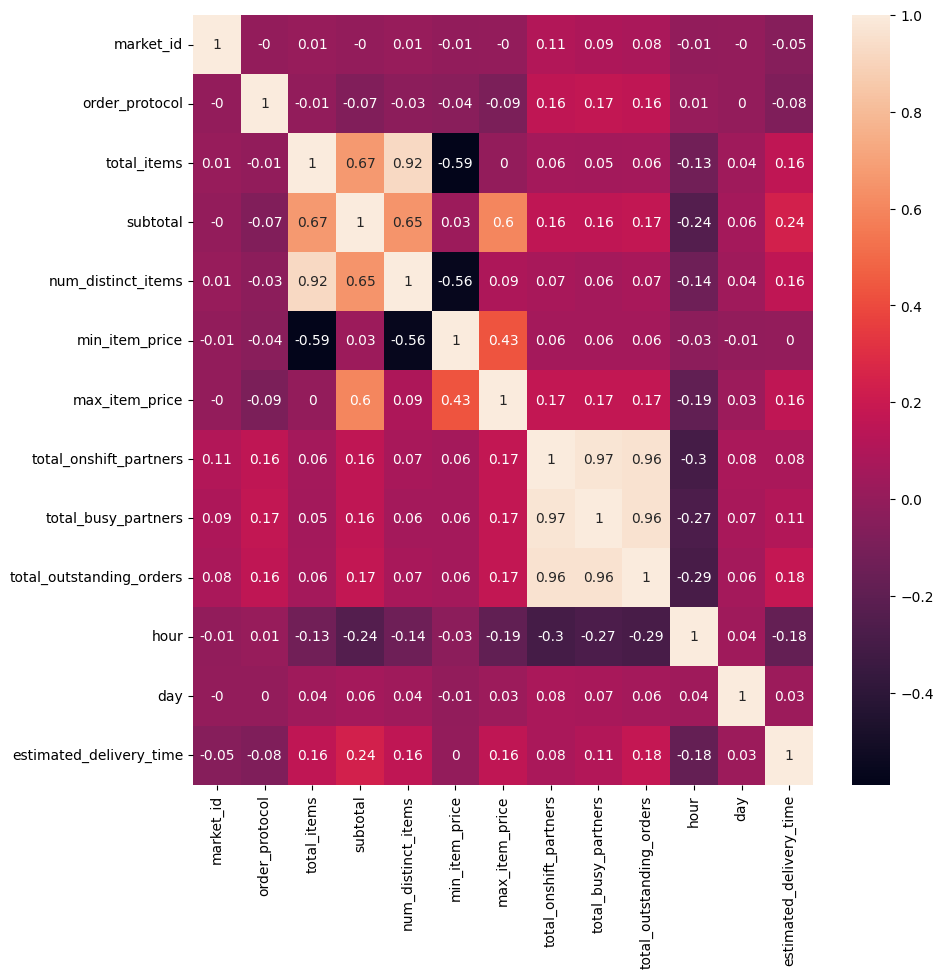

In [20]:
plt.figure(figsize = (10,10))

sns.heatmap(df.corr(method="spearman").round(2), annot = True)
plt.show()

In [21]:
# uni-variate analysis 
df["order_protocol"].value_counts()

1.0    48518
3.0    47271
5.0    41509
2.0    20958
4.0    17292
6.0      681
7.0       19
Name: order_protocol, dtype: int64

<AxesSubplot: xlabel='order_protocol', ylabel='count'>

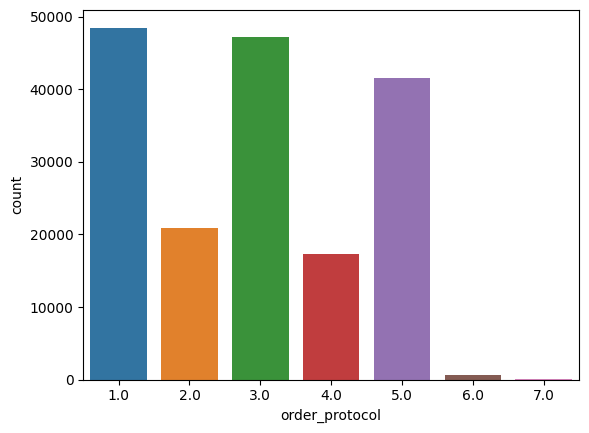

In [22]:
sns.countplot(data=df,x=df["order_protocol"])

most of the orders are placed through porter

<AxesSubplot: xlabel='day', ylabel='count'>

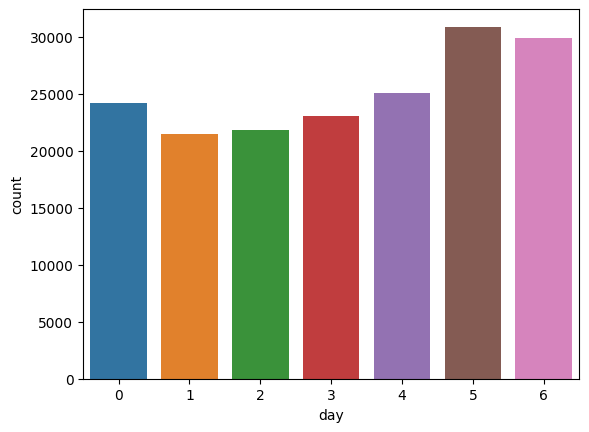

In [23]:
# let's see the day on which the orders are placed the most 
sns.countplot(data = df, x = df["day"])
# almost for all the days the order count is same

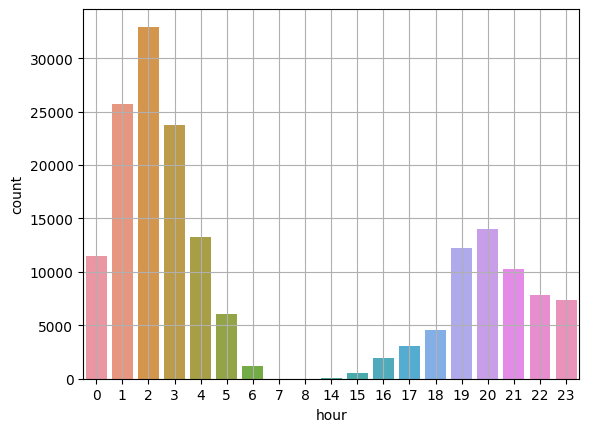

In [24]:
sns.countplot(data = df, x = df["hour"])
plt.grid()
plt.show()
# we could see the peak hour distribution

In [25]:
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'hour', 'day', 'estimated_delivery_time'],
      dtype='object')

<AxesSubplot: xlabel='market_id', ylabel='count'>

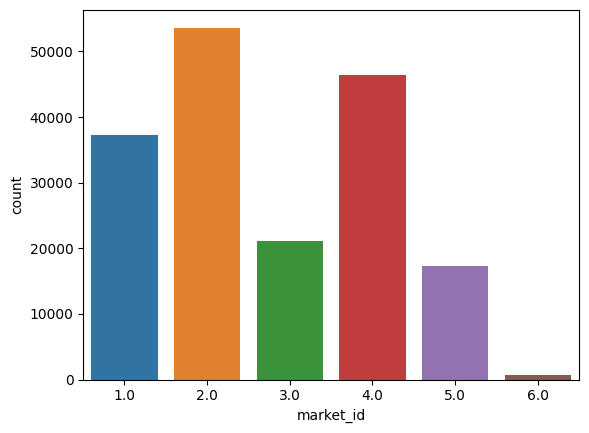

In [26]:
sns.countplot(data = df, x = df["market_id"])
# we can see that most of the orders are from market id 2

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   store_primary_category    176248 non-null  object 
 2   order_protocol            176248 non-null  float64
 3   total_items               176248 non-null  int64  
 4   subtotal                  176248 non-null  int64  
 5   num_distinct_items        176248 non-null  int64  
 6   min_item_price            176248 non-null  int64  
 7   max_item_price            176248 non-null  int64  
 8   total_onshift_partners    176248 non-null  float64
 9   total_busy_partners       176248 non-null  float64
 10  total_outstanding_orders  176248 non-null  float64
 11  hour                      176248 non-null  int64  
 12  day                       176248 non-null  int64  
 13  estimated_delivery_time   176248 non-null  f

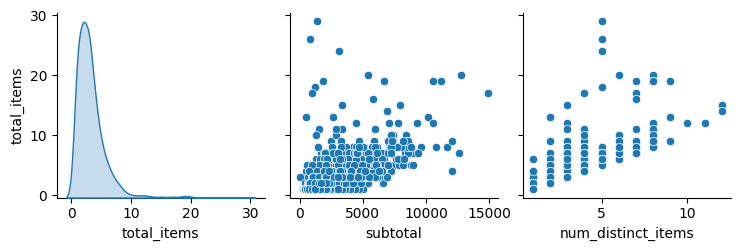

In [28]:
sns.pairplot(df.sample(1500), x_vars=['total_items', 'subtotal', 'num_distinct_items'],y_vars=['total_items'], diag_kind='kde')

In [29]:
# total_items and num_distinct_items are highly correlated 
# so we can drop num_distinct_items
df.drop(["num_distinct_items"], axis = 1, inplace = True)

<AxesSubplot: xlabel='total_outstanding_orders', ylabel='Density'>

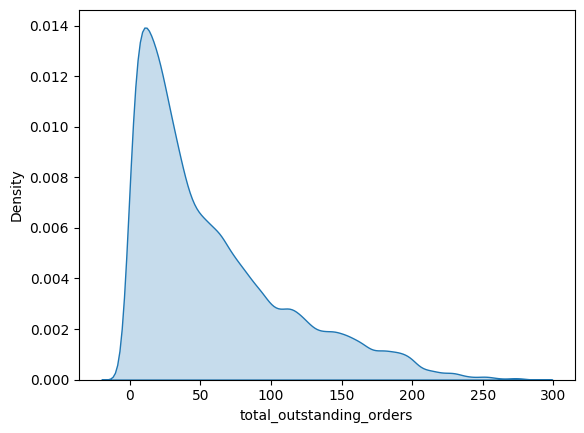

In [30]:
# let's check the distribution of orders 
sns.kdeplot(df["total_outstanding_orders"],fill=True)

<AxesSubplot: xlabel='day', ylabel='total_outstanding_orders'>

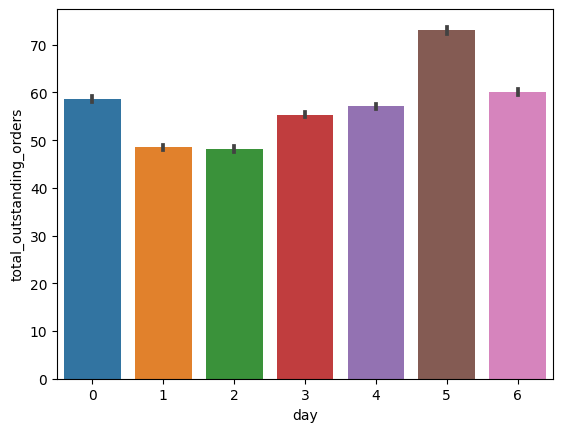

In [31]:
# total outstanding orders per each day 

sns.barplot(data = df, x = df["day"], y = df["total_outstanding_orders"])

<AxesSubplot: xlabel='day', ylabel='total_onshift_partners'>

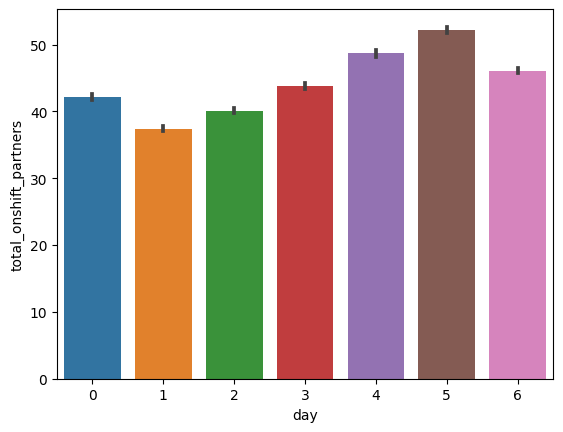

In [32]:
sns.barplot(data = df, x = df["day"], y = df["total_onshift_partners"])

In [33]:
# let's find out on which day which category is more popular 

df.groupby("day")["store_primary_category"].value_counts().nlargest(10)

day  store_primary_category
6    american                  3366
5    american                  3240
     pizza                     3177
6    pizza                     3023
     mexican                   2687
5    mexican                   2682
4    american                  2549
0    american                  2438
     pizza                     2279
3    american                  2254
Name: store_primary_category, dtype: int64

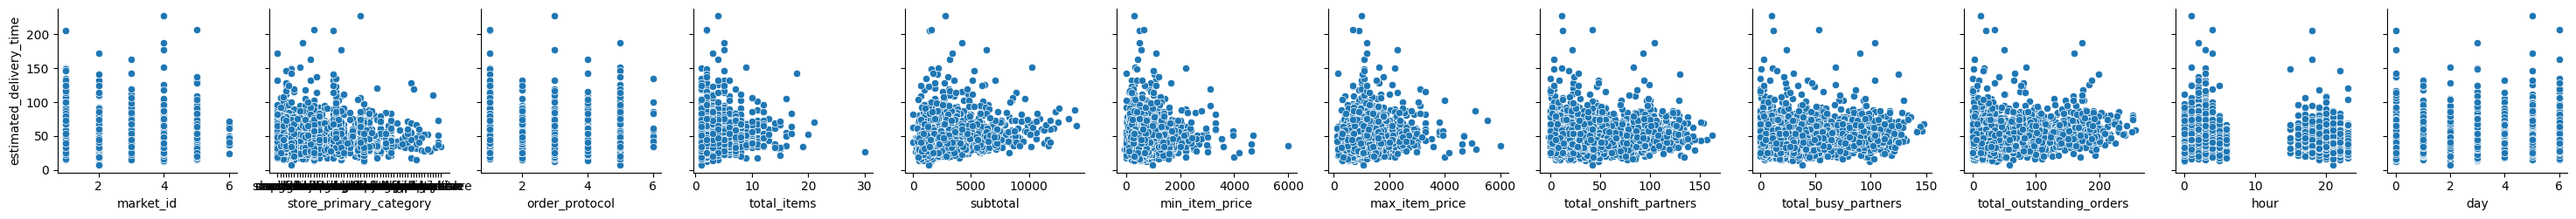

In [34]:
sns.pairplot(data=df.sample(3000),y_vars=["estimated_delivery_time"],x_vars=['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'hour', 'day'], diag_kind='kde')

<AxesSubplot: xlabel='day', ylabel='estimated_delivery_time'>

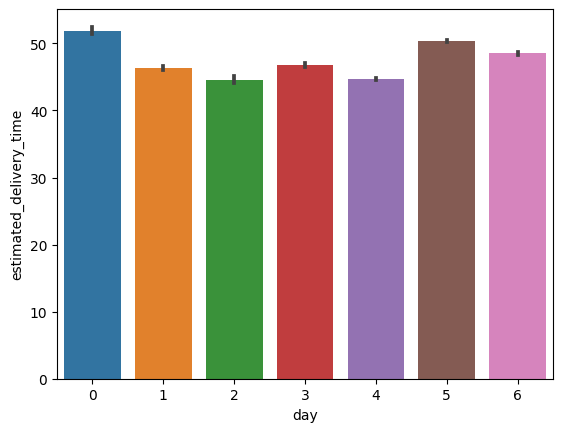

In [35]:
# day vs estimated delivery time 
sns.barplot(data = df, x = df["day"], y = df["estimated_delivery_time"]) 
# the average estimated delivery time remains almost consitent for all the days 
# we observed the same via pairplot 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   store_primary_category    176248 non-null  object 
 2   order_protocol            176248 non-null  float64
 3   total_items               176248 non-null  int64  
 4   subtotal                  176248 non-null  int64  
 5   min_item_price            176248 non-null  int64  
 6   max_item_price            176248 non-null  int64  
 7   total_onshift_partners    176248 non-null  float64
 8   total_busy_partners       176248 non-null  float64
 9   total_outstanding_orders  176248 non-null  float64
 10  hour                      176248 non-null  int64  
 11  day                       176248 non-null  int64  
 12  estimated_delivery_time   176248 non-null  float64
dtypes: float64(6), int64(6), object(1)
memory us

<AxesSubplot: xlabel='estimated_delivery_time', ylabel='max_item_price'>

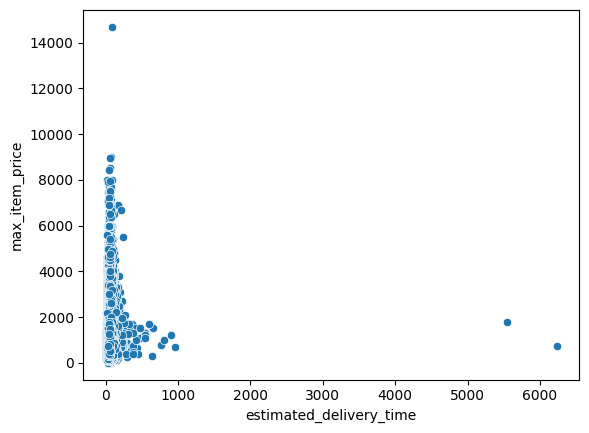

In [37]:
sns.scatterplot(data=df,x="estimated_delivery_time",y="max_item_price")

we could observe from the heatmap that none of the features has a strong correlation with estimated delivery time

(0.0, 1000.0)

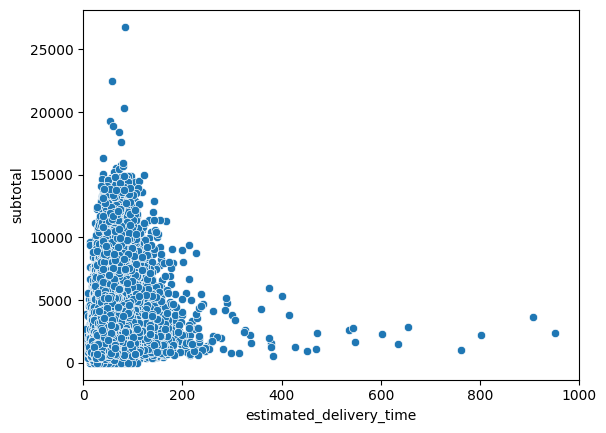

In [38]:
sns.scatterplot(data=df,x="estimated_delivery_time",y="subtotal")
plt.xlim(0,1000)



(0.0, 100.0)

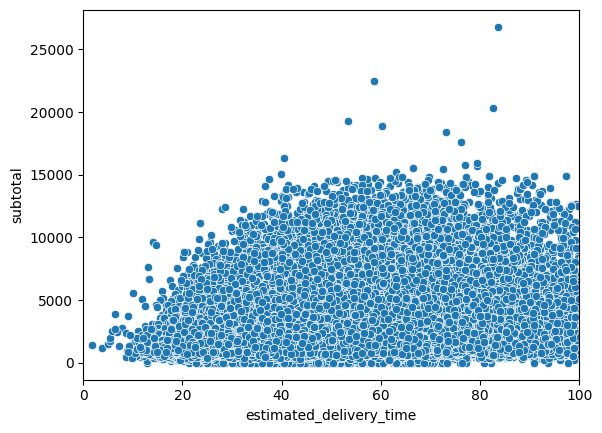

In [39]:
sns.scatterplot(data=df,x="estimated_delivery_time",y="subtotal")
plt.xlim(0,100) 

Market_id , day , hour , order_protocol are categorical in nature , if we omit them 
we could see that there are lot of outliers in the data in almost all the features

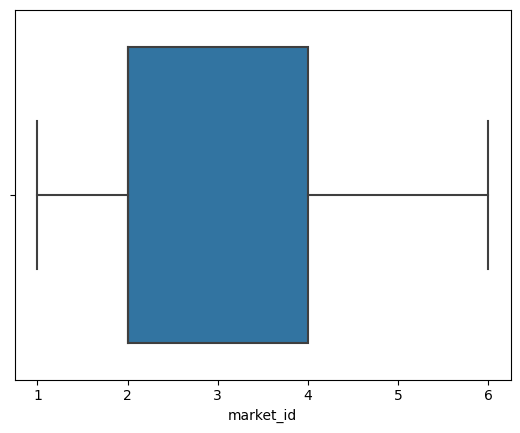

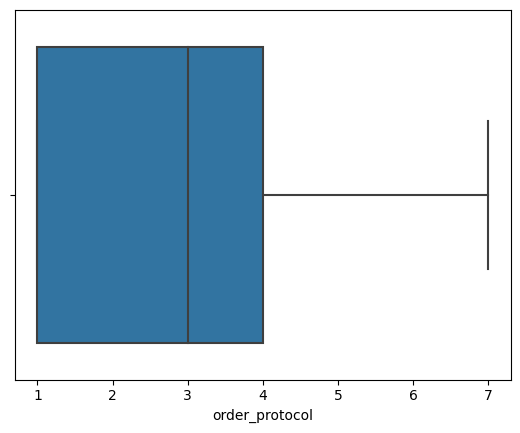

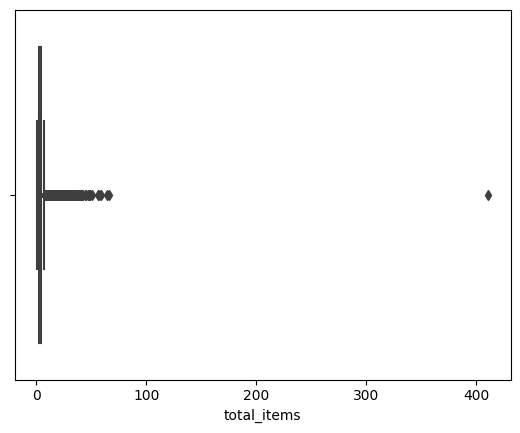

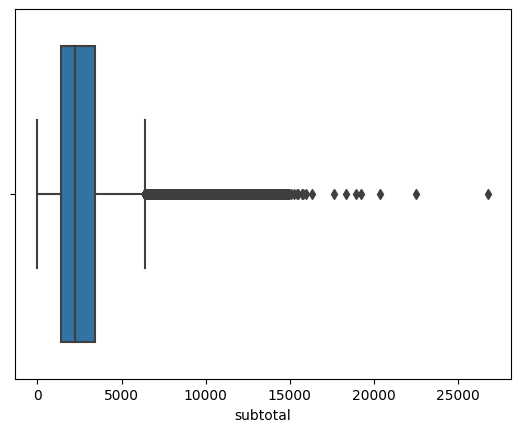

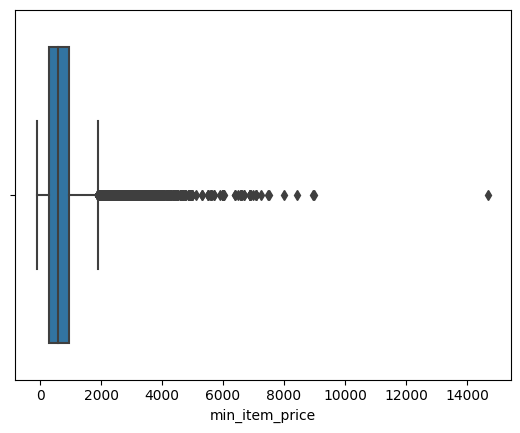

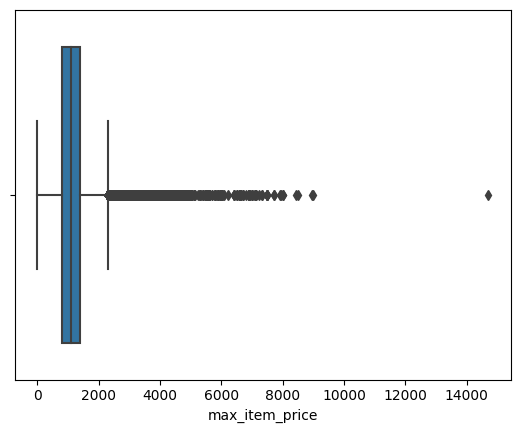

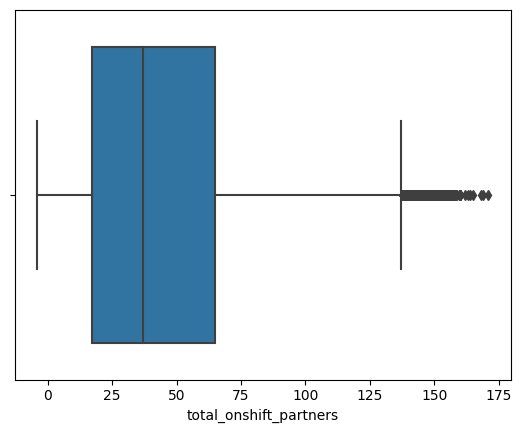

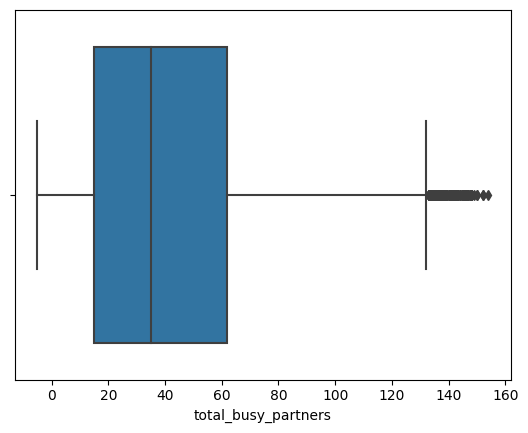

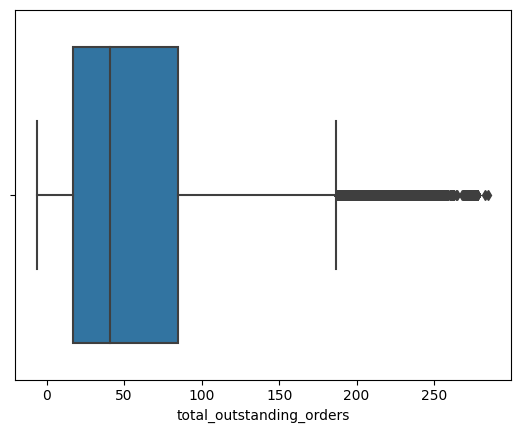

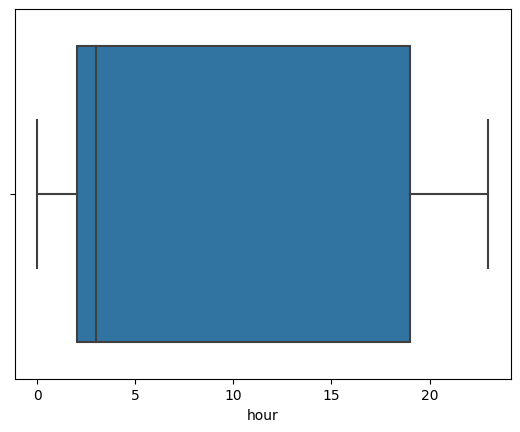

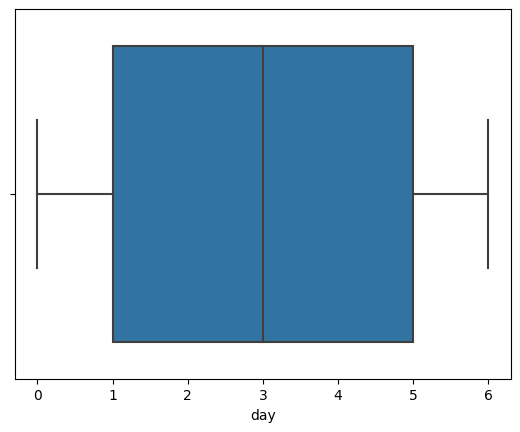

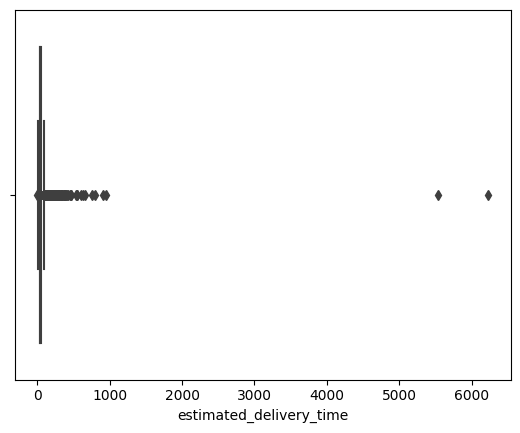

In [40]:


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for each in numeric_cols : 
    sns.boxplot(data = df, x = df[each])
    plt.show()

<AxesSubplot: xlabel='total_onshift_partners', ylabel='total_busy_partners'>

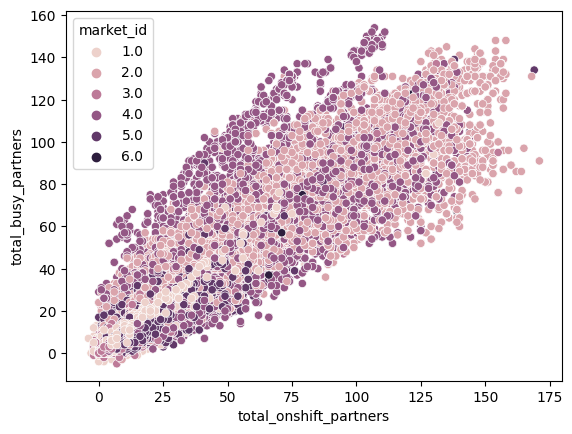

In [41]:
sns.scatterplot(data = df, x = df["total_onshift_partners"], y = df["total_busy_partners"],hue="market_id")


Outlier-removal with LOF 

Applying LOF on numerical columns

In [42]:
# Local outlier factor 

from sklearn.neighbors import LocalOutlierFactor

lmodel = LocalOutlierFactor()

df["l_outlier"] = lmodel.fit_predict(df[numeric_cols])


In [43]:
df.sample(3)

,market_id,store_primary_category,order_protocol,total_items,subtotal,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour,day,estimated_delivery_time,l_outlier
124973,2.0,breakfast,2.0,2,2295,600,1695,43.0,43.0,57.0,19,4,42.300000,1
98555,2.0,mexican,5.0,1,799,799,799,70.0,57.0,61.0,4,2,27.133333,1
82625,4.0,cafe,4.0,4,1080,195,295,22.0,20.0,28.0,0,3,63.600000,1


In [44]:
df["l_outlier"].value_counts()

 1    173528
-1      2720
Name: l_outlier, dtype: int64

In [45]:
df["store_primary_category"].nunique()  
# let's encode store_primary_category  

73

We use LOF on the numerical columns and created embedding for the store_primary_category 
and then concatenate back to original df

In [46]:
from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding

# LabelEncoder instance cuz the embedding model needs int/ float as input
le = LabelEncoder()

encoded_data = le.fit_transform(df["store_primary_category"])

# Embedding layer
embedding_layer = Embedding(input_dim=73, output_dim=10, input_length=1)

embedded_data = embedding_layer(encoded_data)

In [47]:
final_embed = embedded_data.numpy()

In [48]:
final_embed_df = pd.DataFrame(final_embed).reset_index(drop=True)

In [49]:
final_embed_df.shape

(176248, 10)

In [51]:
final_df = pd.concat([df, final_embed_df], axis=1)

In [ ]:
final_df.dropna(axis = 0,inplace=True)
final_df.shape

In [85]:
# considering only the l_outlier =1 

final_df = final_df[final_df["l_outlier"] == 1]

In [90]:
final_df.drop(["l_outlier",'store_primary_category'], axis = 1, inplace = True)

Model Building

In [93]:
# train test split 
from sklearn.model_selection import train_test_split
X = final_df.drop('estimated_delivery_time',axis=1)
y = final_df['estimated_delivery_time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# random forest regressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

regressor = RandomForestRegressor(n_estimators=10, random_state =42)
regressor.fit(X_train.values, y_train)
# we can try changing the number of estimators, depth etc..

RandomForestRegressor(n_estimators=10, random_state=42)

In [101]:
y_pred = regressor.predict(X_test.values)

In [102]:
mse  = mean_squared_error(y_test, y_pred)

rmse = mse**0.5 

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

print(f'mse : {mse},RMSE: {rmse}, R2: {r2}, MAE: {mae}')

mse : 249.59365950441276,RMSE: 15.79853346055933, R2: 0.19347573165167964, MAE: 11.884492788435702


In [103]:
# mean absolute percentage error 

from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

0.2756874561610839

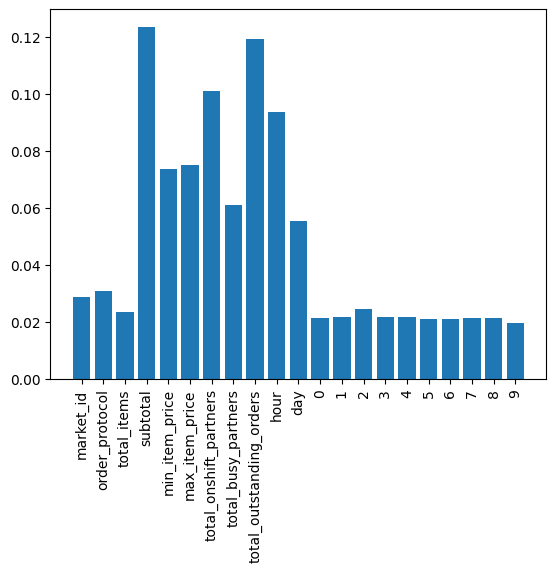

In [118]:
# regressor features importance , plot bar plot 

importance = regressor.feature_importances_

plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(len(importance)), X.columns, rotation = 90)

plt.show()

Neural network regressor 

In [120]:
# building a simple neural network 

from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [122]:
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [125]:
model = Sequential() 

model.add(Dense(32, activation = 'relu',kernel_initializer='glorot_uniform'))

model.add(Dense(64, activation = 'relu',kernel_initializer='glorot_uniform')) 
model.add(Dense(128, activation = 'relu',kernel_initializer='glorot_uniform'))
model.add(Dense(512, activation = 'relu',kernel_initializer='glorot_uniform'))
model.add(Dense(64, activation = 'relu',kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation = 'linear',kernel_initializer='glorot_uniform'))


In [127]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

In [129]:
history = model.fit(X_train, y_train, epochs=30, batch_size=512, validation_split=0.2,verbose=1)

c:\Users\mahik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/30
194/194 [==============================] - 6s 17ms/step - loss: 501.0687 - mse: 501.0687 - mae: 16.3438 - val_loss: 279.5808 - val_mse: 279.5808 - val_mae: 12.7903
Epoch 2/30
194/194 [==============================] - 2s 13ms/step - loss: 267.8760 - mse: 267.8760 - mae: 12.2924 - val_loss: 257.0029 - val_mse: 257.0029 - val_mae: 12.1645
Epoch 3/30
194/194 [==============================] - 3s 14ms/step - loss: 254.1431 - mse: 254.1431 - mae: 11.9745 - val_loss: 251.2725 - val_mse: 251.2725 - val_mae: 12.1297
Epoch 4/30
194/194 [==============================] - 3s 13ms/step - loss: 248.7332 - mse: 248.7332 - mae: 11.8415 - val_loss: 244.7708 - val_mse: 244.7708 - val_mae: 11.8738
Epoch 5/30
194/194 [==============================] - 2s 11ms/step - loss: 244.6962 - mse: 244.6962 - mae: 11.7422 - val_loss: 241.1780 - val_mse: 241.1780 - val_mae: 11.6536
Epoch 6/30
194/194 [==============================] - 3s 15ms/step - loss: 242.3232 - mse: 242.3232 - mae: 11.6836 - val_loss

In [130]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 110081 (430.00 KB)
Trainable params: 11008

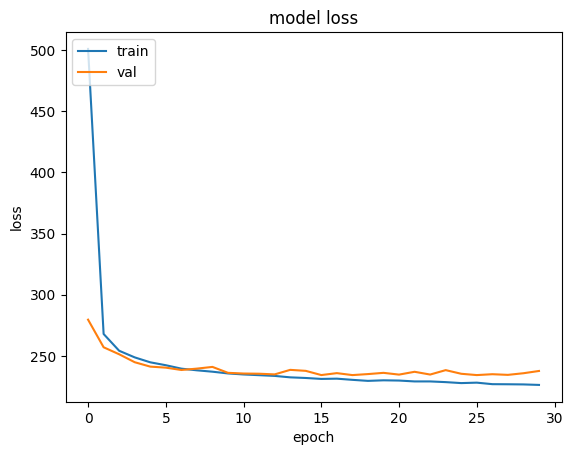

In [131]:
# plot losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [132]:
model2 = Sequential()
model2.add(Dense(14,  kernel_initializer='normal', activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='linear'))

In [134]:
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

In [135]:
history = model2.fit(X_train, y_train, epochs=30, batch_size=512, validation_split=0.2,verbose=0)

c:\Users\mahik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


In [137]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 14)                308       
                                                                 
 dense_7 (Dense)             (None, 512)               7680      
                                                                 
 dense_8 (Dense)             (None, 1024)              525312    
                                                                 
 dense_9 (Dense)             (None, 256)               262400    
                                                                 
 dense_10 (Dense)            (None, 1)                 257       
                                                                 
Total params: 795957 (3.04 MB)
Trainable params: 795957 (3.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


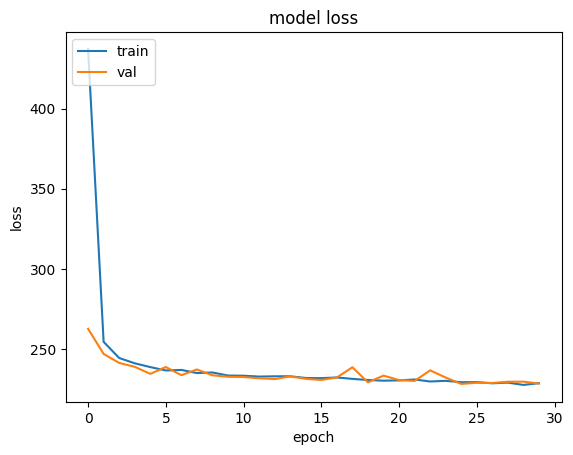

In [136]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [138]:
pred = model2.predict(X_test)

mse  = mean_squared_error(y_test, pred)

rmse = mse**0.5

r2 = r2_score(y_test, pred)

mae = mean_absolute_error(y_test, pred)

print(f'mse : {mse},RMSE: {rmse}, R2: {r2}, MAE: {mae}')


970/970 [==============================] - 7s 7ms/step
mse : 230.57648656169593,RMSE: 15.184745192517916, R2: 0.25492685795085146, MAE: 11.298875523662058


In [139]:
# try to do feature engeneering again by removing - store_primary_category and redo the model building and reduce mse as well.
# try out the hyperparameter tuning for both random forest and neural network.